In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [30]:
file_path = 'D:/stockmarketpreddiction/AAPL Historical Data.csv'  # Update the file path
df = pd.read_csv(file_path)

In [31]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Adjust format as per your data
df.sort_values('Date', inplace=True)
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)

In [32]:
df['Price_Change'] = df['Price'].diff()
df['Direction'] = np.where(df['Price_Change'] > 0, 1, 0)
df['Day'] = (df['Date'] - df['Date'].min()).dt.days

In [33]:
df['SMA_5'] = df['Price'].rolling(window=5).mean()  # 5-day simple moving average
df['SMA_10'] = df['Price'].rolling(window=10).mean()  # 10-day simple moving average
df['EMA_5'] = df['Price'].ewm(span=5, adjust=False).mean()  # 5-day exponential moving average
df['EMA_10'] = df['Price'].ewm(span=10, adjust=False).mean()  # 10-day exponential moving average
df['Volatility'] = df['Price'].rolling(window=10).std()

In [34]:
df.dropna(inplace=True)

In [35]:
X = df[['Day', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'Volatility']]
y = df['Direction']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.67
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [40]:
future_days = 30
last_day = df['Day'].max()
future_X = pd.DataFrame({
    'Day': np.arange(last_day + 1, last_day + 1 + future_days),
    'SMA_5': df['SMA_5'].iloc[-1],
    'SMA_10': df['SMA_10'].iloc[-1],
    'EMA_5': df['EMA_5'].iloc[-1],
    'EMA_10': df['EMA_10'].iloc[-1],
    'Volatility': df['Volatility'].iloc[-1]
})
predictions = model.predict(future_X)

In [41]:
future_dates = pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=future_days)
pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_Direction': predictions})

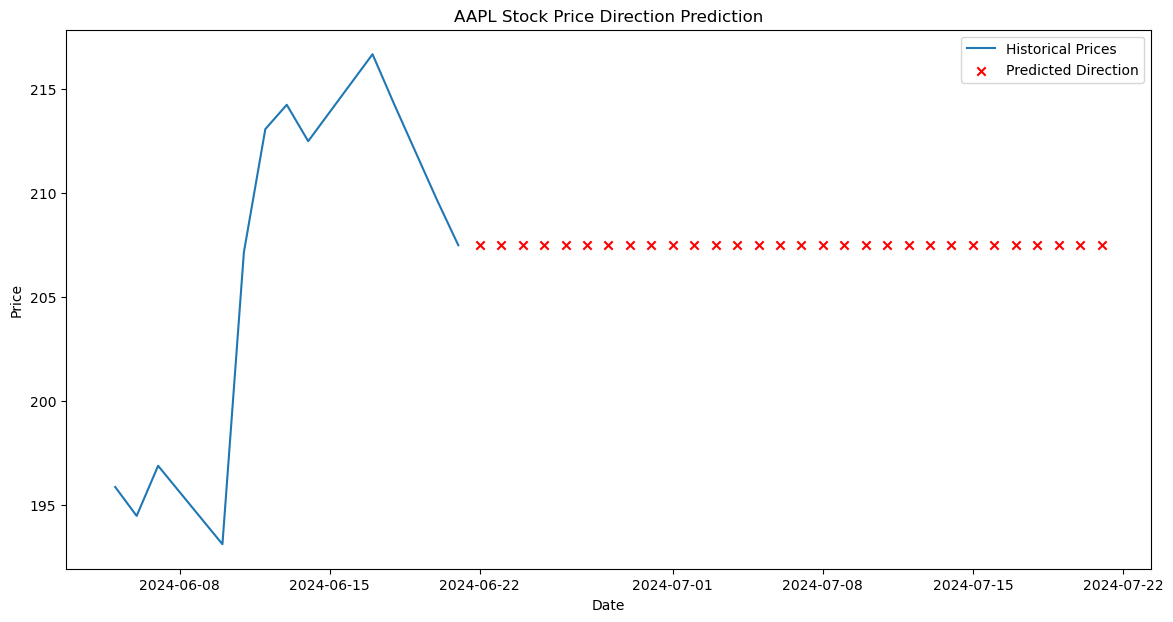

         Date  Predicted_Direction
0  2024-06-22                    0
1  2024-06-23                    0
2  2024-06-24                    0
3  2024-06-25                    0
4  2024-06-26                    0
5  2024-06-27                    0
6  2024-06-28                    0
7  2024-06-29                    0
8  2024-06-30                    0
9  2024-07-01                    0
10 2024-07-02                    0
11 2024-07-03                    0
12 2024-07-04                    0
13 2024-07-05                    0
14 2024-07-06                    0
15 2024-07-07                    0
16 2024-07-08                    0
17 2024-07-09                    0
18 2024-07-10                    0
19 2024-07-11                    0
20 2024-07-12                    0
21 2024-07-13                    0
22 2024-07-14                    0
23 2024-07-15                    0
24 2024-07-16                    0
25 2024-07-17                    0
26 2024-07-18                    0
27 2024-07-19       

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Historical Prices')
plt.scatter(pred_df['Date'], df['Price'].iloc[-1] * (1 + 0.01 * pred_df['Predicted_Direction'].cumsum()), label='Predicted Direction', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price Direction Prediction')
plt.legend()
plt.show()

# Print the predictions
print(pred_df)